## Cost of Foodstuffs in Nigeria

In [127]:
# Import necessary libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [128]:
# Import the url

url = 'https://informationngr.com/cost-of-foodstuffs-in-nigeria/'

In [129]:
r = requests.get(url) # sends an HTTP GET request to the URL
soup = BeautifulSoup(r.content, 'html.parser') # library is used to parse the content of the web page

In [130]:
tables = soup.find_all("table")
main_item_list = [] # Initialize an empty list called main_item_list and main_list
main_list = []

for table in tables: #  loop that iterates through each table found on the webpage
    table_rows = table.find_all('tr')
    item_list = []
    for tr in table_rows:
        td = tr.find_all('td')
        row = [i.text for i in td]
        item_list.append(row)
    main_item_list.append(item_list)  
    
    
    
for item_list in main_item_list:
    for item in item_list[1:]:
        main_list.append(item)

In [131]:
items = pd.DataFrame(main_list)
items.columns = ["Item", "Amount"]

In [132]:
items

,Item,Amount
0,25kg Mama Gold Rice,"₦21,000 – ₦23,000"
1,Mama Gold 10kg Rice,"₦8,500 – ₦10,000"
2,Mama’s Pride 25kg Rice,"₦10,000 – ₦15,500"
3,Mama’s Pride 50kg Rice,"₦45,000 – ₦50,500"
4,Caprice 25kg Rice,"₦35,000 to ₦40,000"
5,Caprice 50kg Rice,"₦50,000 to ₦60,000"
6,50kg Royal Stallion Rice,"₦50,000 to ₦60,000"
7,Royal Stallion Rice of 25kg,"₦20,000 to ₦30,000"
8,Royal Stallion 10kg Rice,"₦9,000 to ₦12,000"
9,50kg Mama Africa,"₦60,000 to ₦70,000"


## Data Wrangling

In [133]:
# Remove "N" and "," from the Prices column
items['Amount'] = items['Amount'].str.replace('₦', '').str.replace(',', '')


In [134]:
items = items.replace({'Mama Gold 10kg Rice':'10kg Mama Gold Rice'},regex = True)
items = items.replace({'Royal Stallion Rice of 25kg': '25kg  Royal Stallion Rice'}, regex=True)
items = items.replace({'Royal Stallion 10kg Rice': '10kg  Royal Stallion Rice'}, regex=True)
items = items.replace({'50kg Olotun': '50kg Olotun'}, regex=True)
items = items.replace({'50kg Butter Beans': 'Butter Beans (50kg)'}, regex=True)
items = items.replace({'50kg White Beans': 'White Beans (50kg)'}, regex=True)
items = items.replace({'50kg Brown Beans': 'Brown Beans (50kg)'}, regex=True)
items = items.replace({'50kg Mama Africa': '50kg Mama Africa Rice'}, regex=True)
items = items.replace({'25kg Mama Africa': '25kg Mama Africa Rice'}, regex=True)
items = items.replace({'80kg Ijebu Gaari': '80kg Ijebu Garri'}, regex=True)
items = items.replace({'50kg White Gaari': '50kg White Garri'}, regex=True)
items = items.replace({'50kg Yellow Gaari': '50kg Yellow Garri'}, regex=True)


In [135]:
# Function to remove "to" and replace it with "-"
def clean_amount(amount_str):
    return amount_str.replace("to", "-")

# Apply the clean_amount function to the 'Amount' column
items['Amount'] = items['Amount'].apply(clean_amount)

# Print the updated DataFrame
print(items)

def clean_amount(amount_str):
    return amount_str.replace("–", "-")

# Apply the clean_amount function to the 'Amount' column
items['Amount'] = items['Amount'].apply(clean_amount)

# Print the updated DataFrame
print(items)


def clean_amount(amount_str):
    return amount_str.replace("and", "-")

# Apply the clean_amount function to the 'Amount' column
items['Amount'] = items['Amount'].apply(clean_amount)

# Print the updated DataFrame
#items


                                     Item                              Amount
0                     25kg Mama Gold Rice                       21000 – 23000
1                     10kg Mama Gold Rice                        8500 – 10000
2                  Mama’s Pride 25kg Rice                       10000 – 15500
3                  Mama’s Pride 50kg Rice                       45000 – 50500
4                       Caprice 25kg Rice                       35000 - 40000
5                       Caprice 50kg Rice                       50000 - 60000
6               50kg  Royal Stallion Rice                       50000 - 60000
7               25kg  Royal Stallion Rice                       20000 - 30000
8               10kg  Royal Stallion Rice                        9000 - 12000
9                   50kg Mama Africa Rice                       60000 - 70000
10                  25kg Mama Africa Rice                       25000 - 30000
11                         5kg Ofada rice                       

In [136]:
# Function to remove "to" and replace it with "-" while handling non-numeric characters
def clean_amount(amount_str):
    amount_str = amount_str.replace('N', '').replace(',', '')
    return amount_str.replace("to", " - ")

def clean_amount(amount_str):
    return amount_str.replace("Upwards", "")

def clean_amount(amount_str):
    return amount_str.replace("upward", "")

# Function to remove "upwards" from the 'Product' column
def clean_product(product_str):
    return product_str.replace(" Upwards", "")

# Apply the clean_product function to the 'Product' column
items['Amount'] = items['Amount'].apply(clean_product)

# Apply the clean_amount function to the 'Amount' column
items['Amount'] = items['Amount'].apply(clean_amount)

# Correct specific rows
items.loc[49, 'Item'] = "Dangote per carton of 20 packs"
items.loc[49, 'Amount'] = "4500 - 18500"
items.loc[50, 'Item'] = "Power per carton of 20 packs"
items.loc[50, 'Amount'] = "4300 - 8600"
items.loc[51, 'Item'] = "Bonita per carton of 20 packs"
items.loc[51, 'Amount'] = "5000 - 1700"
items.loc[52, 'Item'] = "Honeywell per carton of 20 packs"
items.loc[52, 'Amount'] = "4300 - 18500"

In [137]:
items['Amount'] = items['Amount'].str.replace('N', '').str.replace(',', '')
items['Amount'] = items['Amount'].str.replace('₦', '').str.replace(',', '')

In [138]:
# Define a function to calculate the average price
def calculate_average_price(price_range):
    prices = price_range.split('-')
    # Remove any spaces in prices
    prices = [int(price.replace(' ', '').strip()) for price in prices]
    return sum(prices) / len(prices)

# Apply the function to the Prices column and create a new column 'average Prices'
items['Average Prices'] = items['Amount'].apply(calculate_average_price)

In [139]:
pd.set_option('display.max_rows',None)

In [140]:
items

,Item,Amount,Average Prices
0,25kg Mama Gold Rice,21000 - 23000,22000.0
1,10kg Mama Gold Rice,8500 - 10000,9250.0
2,Mama’s Pride 25kg Rice,10000 - 15500,12750.0
3,Mama’s Pride 50kg Rice,45000 - 50500,47750.0
4,Caprice 25kg Rice,35000 - 40000,37500.0
5,Caprice 50kg Rice,50000 - 60000,55000.0
6,50kg Royal Stallion Rice,50000 - 60000,55000.0
7,25kg Royal Stallion Rice,20000 - 30000,25000.0
8,10kg Royal Stallion Rice,9000 - 12000,10500.0
9,50kg Mama Africa Rice,60000 - 70000,65000.0


In [141]:
items.to_csv('Foodstuff_Cost.csv')

In [101]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Item            175 non-null    object 
 1   Amount          175 non-null    object 
 2   Average Prices  175 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.2+ KB


## Exploratory Data Anlysis (EDA)

In [102]:
# Extract the minimum and maximum prices from the "Amount" column
items['Min_Price'] = items['Amount'].apply(lambda x: int(x.split('-')[0].strip()))
items['Max_Price'] = items['Amount'].apply(lambda x: int(x.split('-')[-1].strip()))

# Calculate the range of prices for each item
items['Price_Range'] = items['Max_Price']   -  items['Min_Price']

# Display the items with their price ranges
price_ranges = items[['Item', 'Min_Price', 'Max_Price', 'Price_Range']]
#price_ranges

## Rice Products

The price range for 10kg Mama Gold Rice is 8500 - 10000 Naira.
The price range for 10kg Royal Stallion Rice is 9000 - 12000 Naira.
The price range for Mama’s Pride 25kg Rice is 10000 - 15500 Naira.
The price range for 25kg Mama Gold Rice is 21000 - 23000 Naira.
The price range for 25kg Royal Stallion Rice is 20000 - 30000 Naira.
The price range for Caprice 25kg Rice is 35000 - 40000 Naira.
The price range for Mama’s Pride 50kg Rice is 45000 - 50500 Naira.
The price range for Caprice 50kg Rice is 50000 - 60000 Naira.
The price range for 50kg  Royal Stallion Rice is 50000 - 60000 Naira.


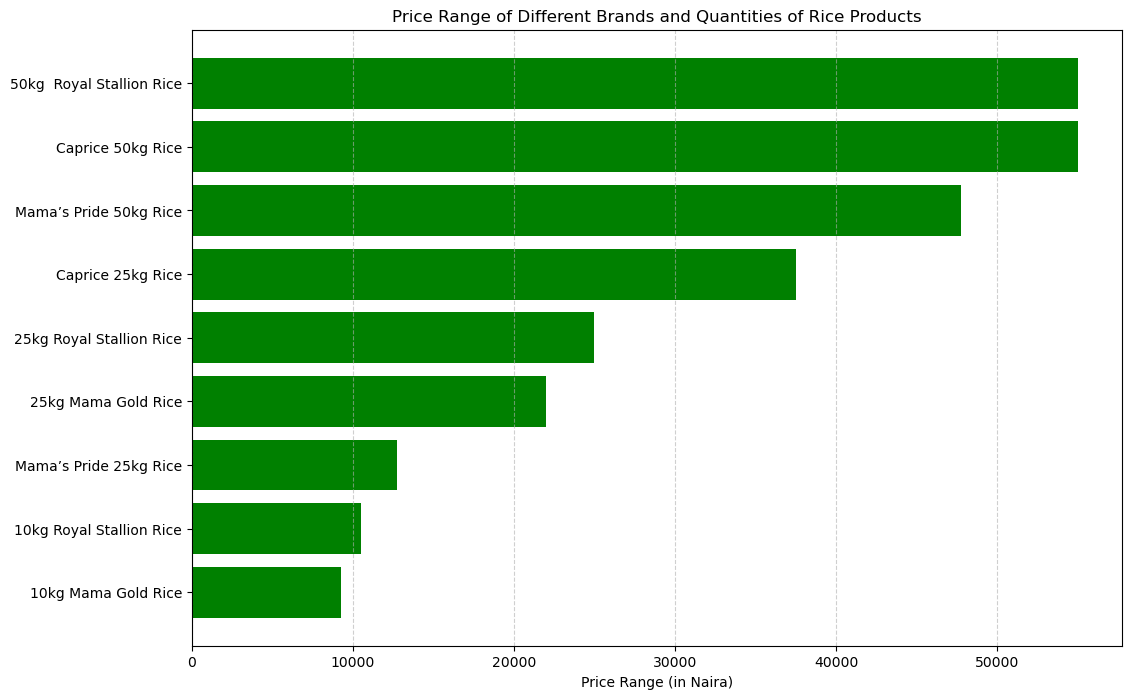

In [103]:
# What is the range of prices for different brands and quantities of rice products?

# Define the dataset with relevant information for various rice products
data = {
    'Item': [
        '25kg Mama Gold Rice',
        '10kg Mama Gold Rice',
        'Mama’s Pride 25kg Rice',
        'Mama’s Pride 50kg Rice',
        'Caprice 25kg Rice',
        'Caprice 50kg Rice',
        '50kg  Royal Stallion Rice',
        '25kg Royal Stallion Rice',
        '10kg Royal Stallion Rice',
    ],
    'Amount': [
        '21000 - 23000',
        '8500 - 10000',
        '10000 - 15500',
        '45000 - 50500',
        '35000 - 40000',
        '50000 - 60000',
        '50000 - 60000',
        '20000 - 30000',
        '9000 - 12000',
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the item names and price ranges
items = df['Item']
price_ranges = df['Amount']

# Convert price ranges to numeric values (use the average of the range)
price_ranges_numeric = [(int(range_.split('-')[0].strip()) + int(range_.split('-')[1].strip())) / 2 for range_ in price_ranges]

# Sort the DataFrame in ascending order based on price range
df['Price_Range'] = price_ranges_numeric
df = df.sort_values(by='Price_Range', ascending=True)

# Display the price ranges in ascending order
for item, price_range in zip(df['Item'], df['Amount']):
    print(f"The price range for {item} is {price_range} Naira.")

# Create a bar plot to visualize the price ranges
plt.figure(figsize=(12, 8))
plt.barh(df['Item'], df['Price_Range'], color='green')
plt.xlabel('Price Range (in Naira)')
plt.title('Price Range of Different Brands and Quantities of Rice Products')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

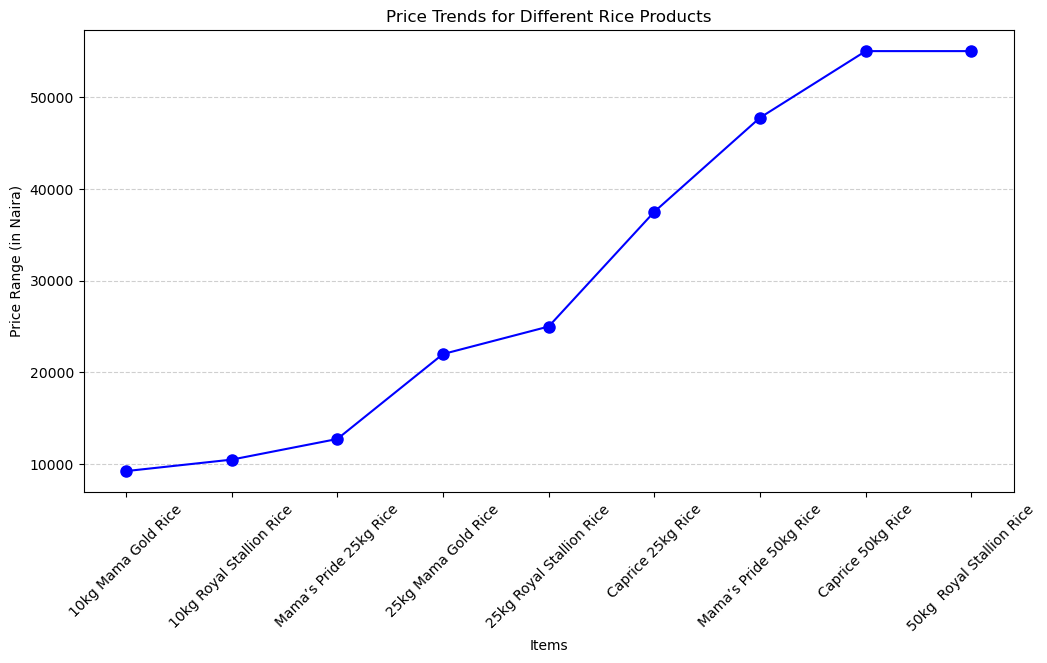

In [104]:
# Are there any noticeable price trends or patterns for different rice products?

# Define the dataset with relevant information for various rice products
data = {
    'Item': [
        '25kg Mama Gold Rice',
        '10kg Mama Gold Rice',
        'Mama’s Pride 25kg Rice',
        'Mama’s Pride 50kg Rice',
        'Caprice 25kg Rice',
        'Caprice 50kg Rice',
        '50kg  Royal Stallion Rice',
        '25kg Royal Stallion Rice',
        '10kg Royal Stallion Rice',
    ],
    'Amount': [
        '21000 - 23000',
        '8500 - 10000',
        '10000 - 15500',
        '45000 - 50500',
        '35000 - 40000',
        '50000 - 60000',
        '50000 - 60000',
        '20000 - 30000',
        '9000 - 12000',
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the item names and price ranges
items = df['Item']
price_ranges = df['Amount']

# Convert price ranges to numeric values (use the average of the range)
price_ranges_numeric = [(int(range_.split('-')[0].strip()) + int(range_.split('-')[1].strip())) / 2 for range_ in price_ranges]

# Add the price range as a new column
df['Price_Range'] = price_ranges_numeric

# Sort the DataFrame in ascending order based on price range
df = df.sort_values(by='Price_Range', ascending=True)

# Create a line plot to visualize the price trends
plt.figure(figsize=(12, 6))
plt.plot(df['Item'], df['Price_Range'], marker='o', color='blue', linestyle='-', markersize=8)
plt.xlabel('Items')
plt.ylabel('Price Range (in Naira)')
plt.title('Price Trends for Different Rice Products')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [105]:
items

0          25kg Mama Gold Rice
1          10kg Mama Gold Rice
2       Mama’s Pride 25kg Rice
3       Mama’s Pride 50kg Rice
4            Caprice 25kg Rice
5            Caprice 50kg Rice
6    50kg  Royal Stallion Rice
7     25kg Royal Stallion Rice
8     10kg Royal Stallion Rice
Name: Item, dtype: object

## Beans

The price range for Olotun (25kg) is 15750 Naira.
The price range for White Beans (25kg) is 16000 Naira.
The price range for Brown Beans (25kg) is 16000 Naira.
The price range for Oloyin (25kg) is 17000 Naira.
The price range for Butter Beans (25kg) is 19500 Naira.
The price range for 50kg Olotun is 32500 Naira.
The price range for White Beans (50kg) is 32750 Naira.
The price range for Brown Beans (50kg) is 33500 Naira.
The price range for Butter Beans (50kg) is 34500 Naira.


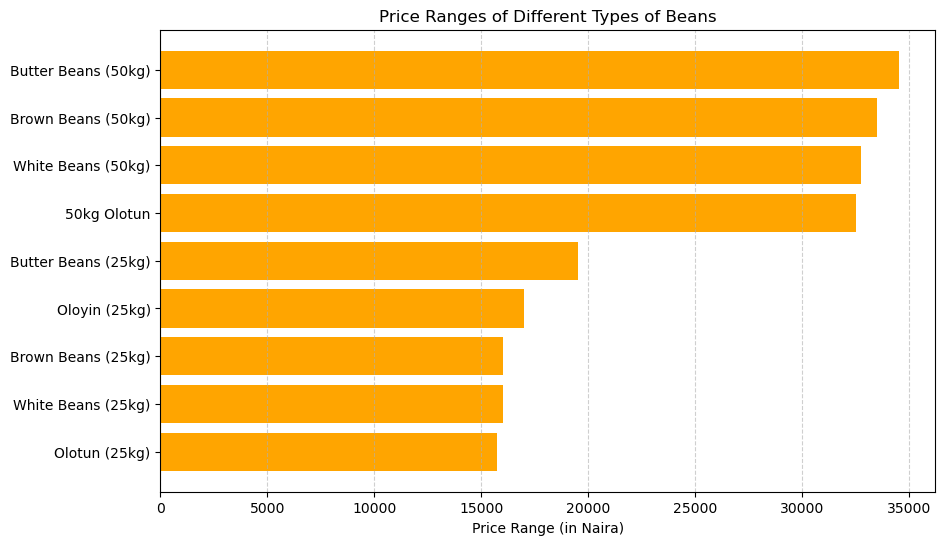

In [106]:
# What is the price range for different types of beans?

# Define the dataset with relevant information for different types of beans
data = {
    'Bean_Type': [
        'Butter Beans (50kg)',
        'Butter Beans (25kg)',
        'White Beans (25kg)',
        'White Beans (50kg)',
        'Brown Beans (25kg)',
        'Brown Beans (50kg)',
        'Oloyin (25kg)',
        '50kg Olotun',
        'Olotun (25kg)'
    ],
    'Price_Range': [
        '34500',
        '19500',
        '16000',
        '32750',
        '16000',
        '33500',
        '17000',
        '32500',
        '15750'
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the bean type names and price ranges
bean_types = df['Bean_Type']
price_ranges = df['Price_Range']

# Convert price ranges to numeric values
price_ranges_numeric = [int(price) for price in price_ranges]

# Add the price range as a new column
df['Price_Range_Numeric'] = price_ranges_numeric

# Sort the DataFrame in ascending order based on price range
df = df.sort_values(by='Price_Range_Numeric', ascending=True)

# Display the price range for different types of beans
for bean, price_range in zip(df['Bean_Type'], df['Price_Range']):
    print(f"The price range for {bean} is {price_range} Naira.")

# Create a bar plot to visualize the price ranges
plt.figure(figsize=(10, 6))
plt.barh(df['Bean_Type'], df['Price_Range_Numeric'], color='orange')
plt.xlabel('Price Range (in Naira)')
plt.title('Price Ranges of Different Types of Beans')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

## Yam

The price range for Regular Yam (Large) is 500-800 Naira.
The price range for Abuja Yam (Medium) is 3500-3650 Naira.
The price range for Abuja Yam (Large) is 3700-3900 Naira.


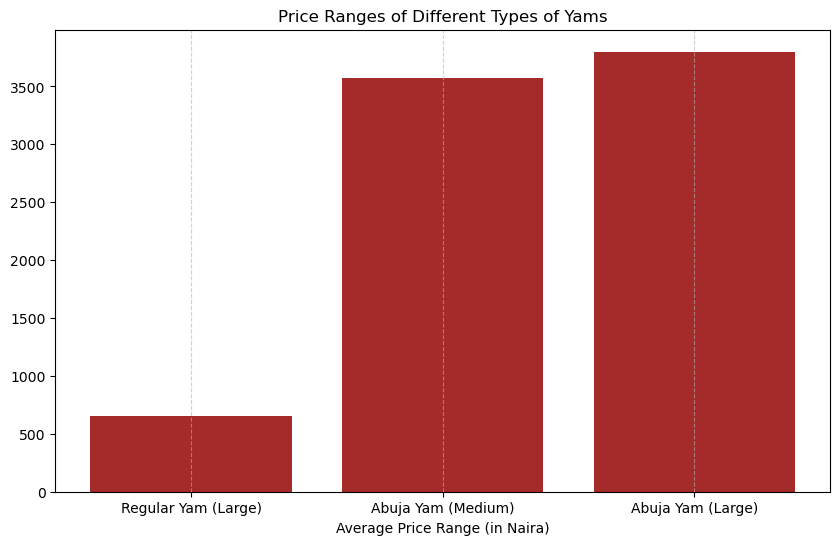

In [107]:


# Define the dataset with relevant information for different types of yams
data = {
    'Yam_Type': [
        'Regular Yam (Large)',
        'Abuja Yam (Large)',
        'Abuja Yam (Medium)',
    ],
    'Price_Range': [
        '500-800',
        '3700-3900',
        '3500-3650',
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the yam type names and price ranges
yam_types = df['Yam_Type']
price_ranges = df['Price_Range']

# Convert price ranges to numeric values (use the average of the range)
price_ranges_numeric = [(int(range_.split('-')[0].strip()) + int(range_.split('-')[1].strip())) / 2 if '-' in range_ else int(range_) for range_ in price_ranges]

# Add the price range as a new column
df['Price_Range_Avg'] = price_ranges_numeric

# Sort the DataFrame in ascending order based on price range
df = df.sort_values(by='Price_Range_Avg', ascending=True)

# Display the price range for different types of yams
for yam, price_range in zip(df['Yam_Type'], df['Price_Range']):
    print(f"The price range for {yam} is {price_range} Naira.")

# Create a bar plot to visualize the price ranges
plt.figure(figsize=(10, 6))
plt.bar(df['Yam_Type'], df['Price_Range_Avg'], color='brown')
plt.xlabel('Average Price Range (in Naira)')
plt.title('Price Ranges of Different Types of Yams')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


## Cooking Oil

The price range for 5 litres Gallon of Palm Oil is 4300 - 10800 Naira.
The price range for 3.8 litres of Mamador Vegetable Oil is 6000 - 10000 Naira.
The price range for 3 litres of Power Vegetable Oil is 6000 - 15000 Naira.
The price range for 5 litres of Kings Vegetable Oil is 10000 - 15000 Naira.
The price range for 5 litres of Wesson Vegetable Oil is 15000 - 20000 Naira.
The price range for 20 litres of local Vegetable Oil is 16800 - 32000 Naira.
The price range for 20 litres of Palm Oil is 18400 - 34600 Naira.
The price range for 30 litres of local Vegetable Oil is 25200 - 48000 Naira.
The price range for 30 litres Gallon of Palm Oil is 27600 - 51900 Naira.


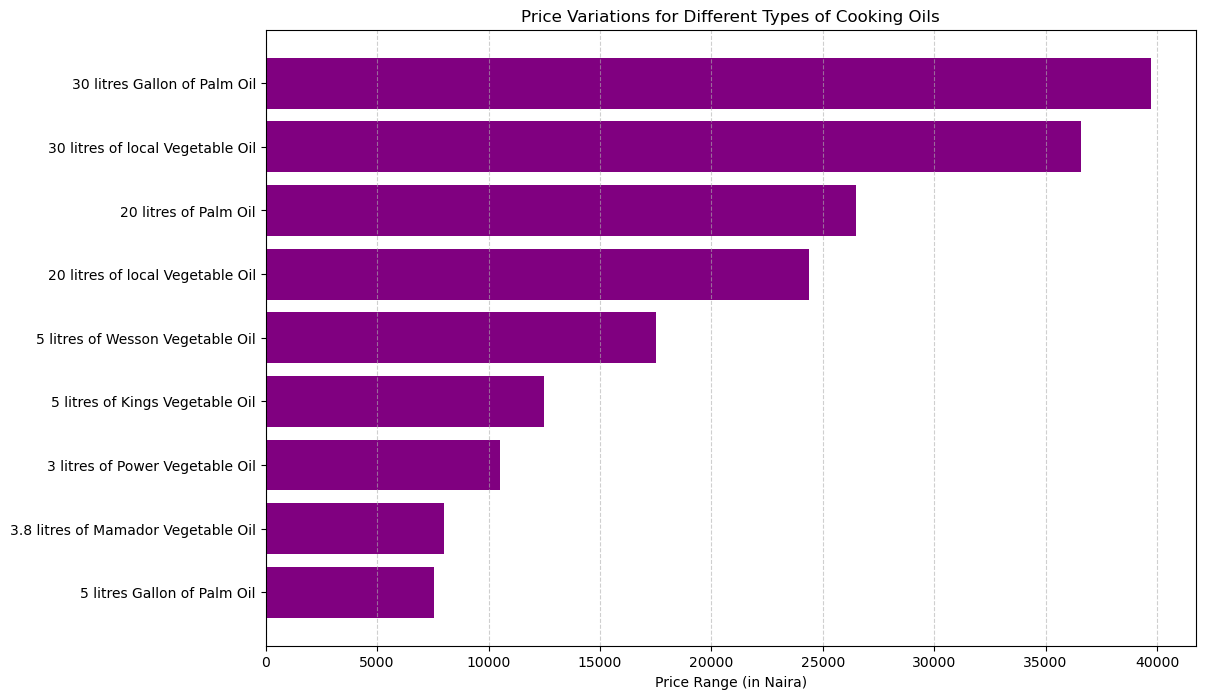

In [108]:
# What are the price variations for different types of cooking oils?

# Define the dataset with relevant information for various types of cooking oils
data = {
    'Item': [
        '30 litres of local Vegetable Oil',
        '5 litres of Kings Vegetable Oil',
        '5 litres of Wesson Vegetable Oil',
        '3.8 litres of Mamador Vegetable Oil',
        '3 litres of Power Vegetable Oil',
        '5 litres Gallon of Palm Oil',
        '20 litres of local Vegetable Oil',
        '20 litres of Palm Oil',
        '30 litres Gallon of Palm Oil',
    ],
    'Amount': [
        '25200 - 48000',
        '10000 - 15000',
        '15000 - 20000',
        '6000 - 10000',
        '6000 - 15000',
        '4300 - 10800',
        '16800 - 32000',
        '18400 - 34600',
        '27600 - 51900',
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the item names and price ranges
items = df['Item']
price_ranges = df['Amount']

# Convert price ranges to numeric values (use the average of the range)
price_ranges_numeric = [(int(range_.split('-')[0].strip()) + int(range_.split('-')[1].strip())) / 2 for range_ in price_ranges]

# Add the price range as a new column
df['Price_Range'] = price_ranges_numeric

# Sort the DataFrame in ascending order based on price range
df = df.sort_values(by='Price_Range', ascending=True)

# Display the price variations for different types of cooking oils
for item, price_range in zip(df['Item'], df['Amount']):
    print(f"The price range for {item} is {price_range} Naira.")

# Create a bar plot to visualize the price variations
plt.figure(figsize=(12, 8))
plt.barh(df['Item'], df['Price_Range'], color='purple')
plt.xlabel('Price Range (in Naira)')
plt.title('Price Variations for Different Types of Cooking Oils')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


## Ofada Rice

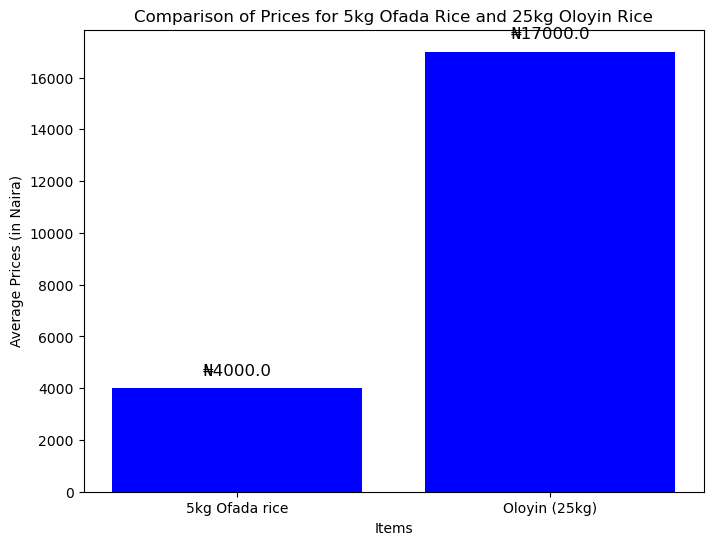

In [109]:
# Compare the prices of 5kg Ofada rice and Oloyin (25kg).

# Item names and corresponding average prices
items = ['5kg Ofada rice', 'Oloyin (25kg)']
average_prices = [4000.0, 17000.0]

# Create a bar plot to compare the prices
plt.figure(figsize=(8, 6))
plt.bar(items, average_prices, color=['blue'])
plt.xlabel('Items')
plt.ylabel('Average Prices (in Naira)')
plt.title('Comparison of Prices for 5kg Ofada Rice and 25kg Oloyin Rice')

# Display the prices on top of the bars
for i, price in enumerate(average_prices):
    plt.text(items[i], price + 500, f'₦{price}', ha='center', fontsize=12)

plt.show()

## Garri

In [110]:
#  What is the price range for various quantities of Garri, such as a paint bucket and 80kg Ijebu Garri?

garri_prices = {
    'A paint bucket of Garri': '1000-1800',
    '80kg Ijebu Garri': '15000-20000',
    '50kg White Garri': '8000-15000',
    '50kg Yellow Garri': '8000-10500'
}

# Display the price ranges for each quantity of Garri
for item, price_range in garri_prices.items():
    print(f"The price range for {item} is ₦{price_range}")

The price range for A paint bucket of Garri is ₦1000-1800
The price range for 80kg Ijebu Garri is ₦15000-20000
The price range for 50kg White Garri is ₦8000-15000
The price range for 50kg Yellow Garri is ₦8000-10500


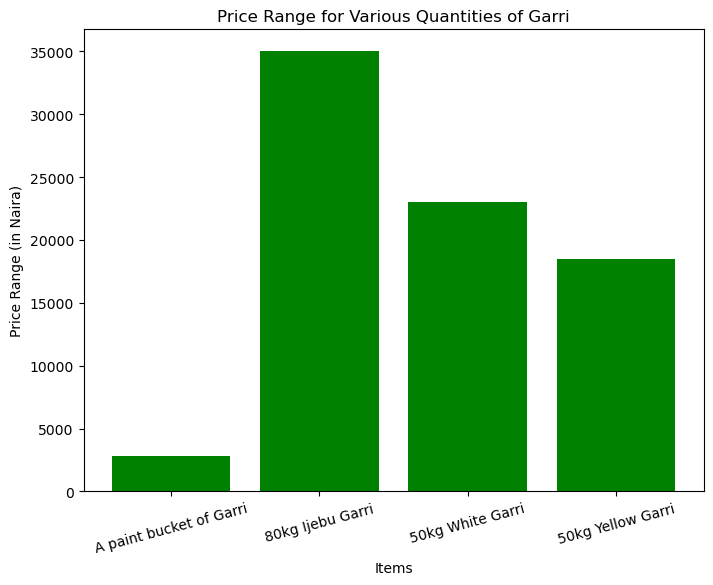

In [111]:

# Create a bar plot to visualize the price ranges
items = list(garri_prices.keys())
price_ranges = [int(range_.split('-')[0]) + int(range_.split('-')[1]) for range_ in garri_prices.values()]

plt.figure(figsize=(8, 6))
plt.bar(items, price_ranges, color=['green'])
plt.xlabel('Items')
plt.ylabel('Price Range (in Naira)')
plt.title('Price Range for Various Quantities of Garri')
plt.xticks(rotation=15)
plt.show()

## Noodles

The price range for Indomie Onion (70g x 40ps) is ₦5500-10000
The price range for Superpack (120g x 40ps) is ₦6500-16500
The price range for Hungry Man (200g x 24ps) is ₦3200-7705
The price range for Indomie is ₦5500-10000
The price range for Superpack is ₦6500-16500
The price range for Hungry Man is ₦3200-7705


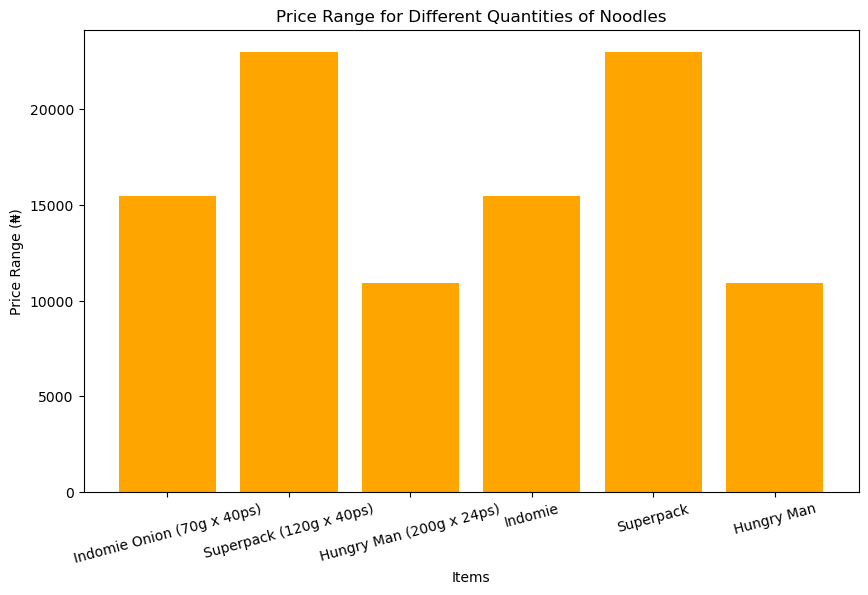

In [112]:
# What is the price range for different quantities of noodles, including Indomie, Superpack, and Hungry Man?

# Define the dataset with relevant information for noodles
data = {
    'Item': [
        'Indomie Onion (70g x 40ps)',
        'Superpack (120g x 40ps)',
        'Hungry Man (200g x 24ps)',
        'Indomie', 
        'Superpack', 
        'Hungry Man'
    ],
    'Amount': [
        '5500-10000',
        '6500-16500',
        '3200-7705',
        '5500-10000', 
        '6500-16500', 
        '3200-7705'
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the item names and price ranges
items = df['Item']
price_ranges = df['Amount']

# Display the price ranges for different quantities of noodles
for item, price_range in zip(items, price_ranges):
    print(f"The price range for {item} is ₦{price_range}")

# Create a bar plot to visualize the price ranges
price_ranges = [int(range_.split('-')[0]) + int(range_.split('-')[1]) for range_ in price_ranges]

plt.figure(figsize=(10, 6))
plt.bar(items, price_ranges, color=['orange'])
plt.xlabel('Items')
plt.ylabel('Price Range (₦)')
plt.title('Price Range for Different Quantities of Noodles')
plt.xticks(rotation=15)
plt.show()


The price range for Dangote per carton of 20 packs is 4500-18500 Naira.
The price range for Power per carton of 20 packs is 4300-8600 Naira.
The price range for Bonita per carton of 20 packs is 5000-1700 Naira.
The price range for Honeywell per carton of 20 packs is 4300-18500 Naira.


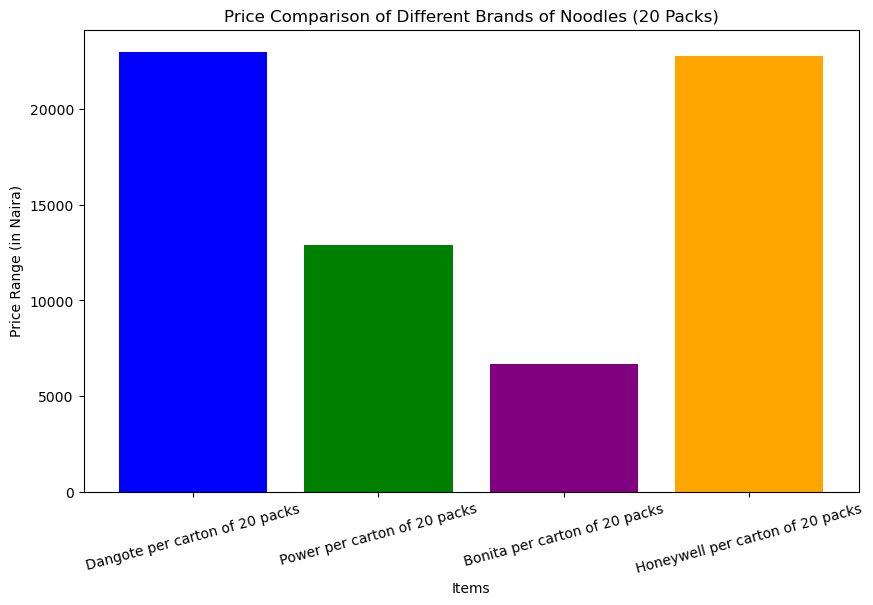

In [113]:
# How do the prices of different brands of noodles compare when purchasing a carton of 20 packs?

# Define the dataset with relevant information for different brands of noodles
data = {
    'Item': [
        'Dangote per carton of 20 packs',
        'Power per carton of 20 packs',
        'Bonita per carton of 20 packs',
        'Honeywell per carton of 20 packs',
    ],
    'Amount': [
        '4500-18500',
        '4300-8600',
        '5000-1700',
        '4300-18500',
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the item names and price ranges
items = df['Item']
price_ranges = df['Amount']

# Display the price ranges for different brands of noodles when purchasing a carton of 20 packs
for item, price_range in zip(items, price_ranges):
    print(f"The price range for {item} is {price_range} Naira.")

# Create a bar plot to visualize the price ranges
price_ranges = [int(range_.split('-')[0]) + int(range_.split('-')[1]) for range_ in price_ranges]

plt.figure(figsize=(10, 6))
plt.bar(items, price_ranges, color=['blue', 'green', 'purple', 'orange'])
plt.xlabel('Items')
plt.ylabel('Price Range (in Naira)')
plt.title('Price Comparison of Different Brands of Noodles (20 Packs)')
plt.xticks(rotation=15)
plt.show()


The price range for A bag of Scotch Bonnet Pepper (Rodo) is 8000-10000 Naira.
The price range for Basket of Red ball pepper (Tatase) is 9000-15000 Naira.
The price range for A bag of Onion (white) is 20000-29000 Naira.
The price range for A bag of Onion (Red) is 18000-28000 Naira.


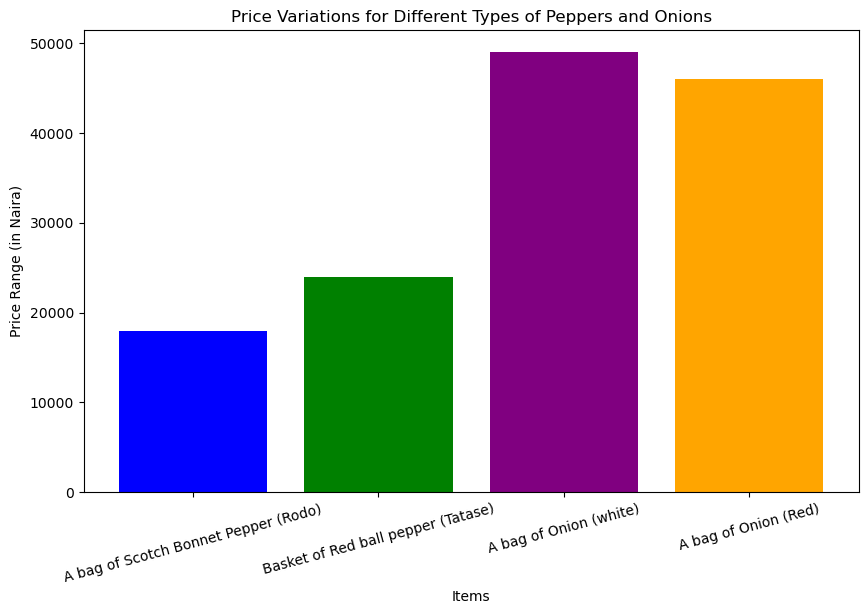

In [114]:
# Analyze the price variations for different types of peppers and onions.

# Define a dataset with relevant information for different types of peppers and onions
data = {
    'Item': [
        'A bag of Scotch Bonnet Pepper (Rodo)',
        'Basket of Red ball pepper (Tatase)',
        'A bag of Onion (white)',
        'A bag of Onion (Red)'
    ],
    'Amount': [
        '8000-10000',
        '9000-15000',
        '20000-29000',
        '18000-28000'
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the item names and price ranges
items = df['Item']
price_ranges = df['Amount']

# Display the price ranges for different types of peppers and onions
for item, price_range in zip(items, price_ranges):
    print(f"The price range for {item} is {price_range} Naira.")

# Create a bar plot to visualize the price ranges
price_ranges = [int(range_.split('-')[0]) + int(range_.split('-')[1]) for range_ in price_ranges]

plt.figure(figsize=(10, 6))
plt.bar(items, price_ranges, color=['blue', 'green', 'purple', 'orange'])
plt.xlabel('Items')
plt.ylabel('Price Range (in Naira)')
plt.title('Price Variations for Different Types of Peppers and Onions')
plt.xticks(rotation=15)
plt.show()


The price range for Wheat Flour is 11500-13500 Naira.
The price range for Flour is 11500-13500 Naira.
The price range for Cassava Flour is 15000-35000 Naira.


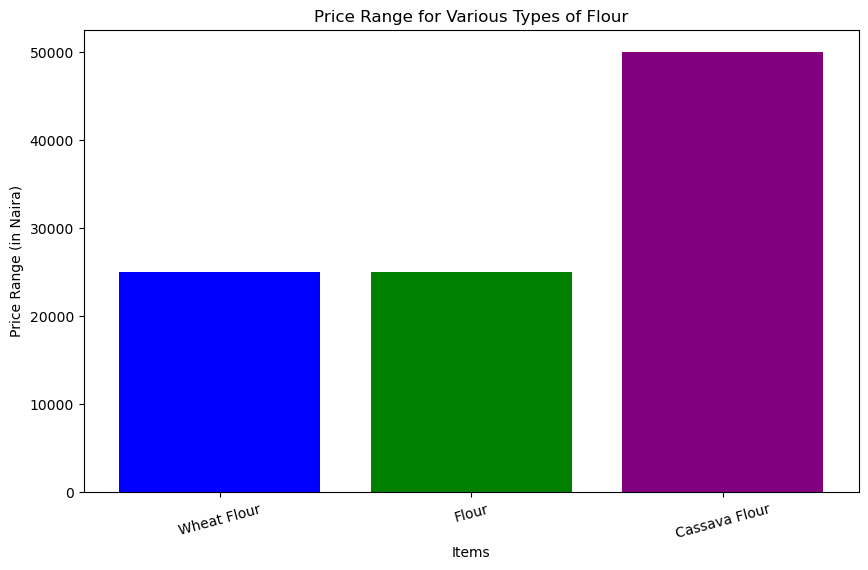

In [115]:
#  What is the price range for various types of flour, including Wheat Flour, Flour, and Cassava Flour

# Define the dataset with relevant information for different types of flour
data = {
    'Item': [
        'Wheat Flour',
        'Flour',
        'Cassava Flour'
    ],
    'Amount': [
        '11500-13500',
        '11500-13500',
        '15000-35000'
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the item names and price ranges
items = df['Item']
price_ranges = df['Amount']

# Display the price ranges for different types of flour
for item, price_range in zip(items, price_ranges):
    print(f"The price range for {item} is {price_range} Naira.")

# Create a bar plot to visualize the price ranges
price_ranges = [int(range_.split('-')[0]) + int(range_.split('-')[1]) for range_ in price_ranges]

plt.figure(figsize=(10, 6))
plt.bar(items, price_ranges, color=['blue', 'green', 'purple'])
plt.xlabel('Items')
plt.ylabel('Price Range (in Naira)')
plt.title('Price Range for Various Types of Flour')
plt.xticks(rotation=15)
plt.show()


## Beverages and Dairy Products

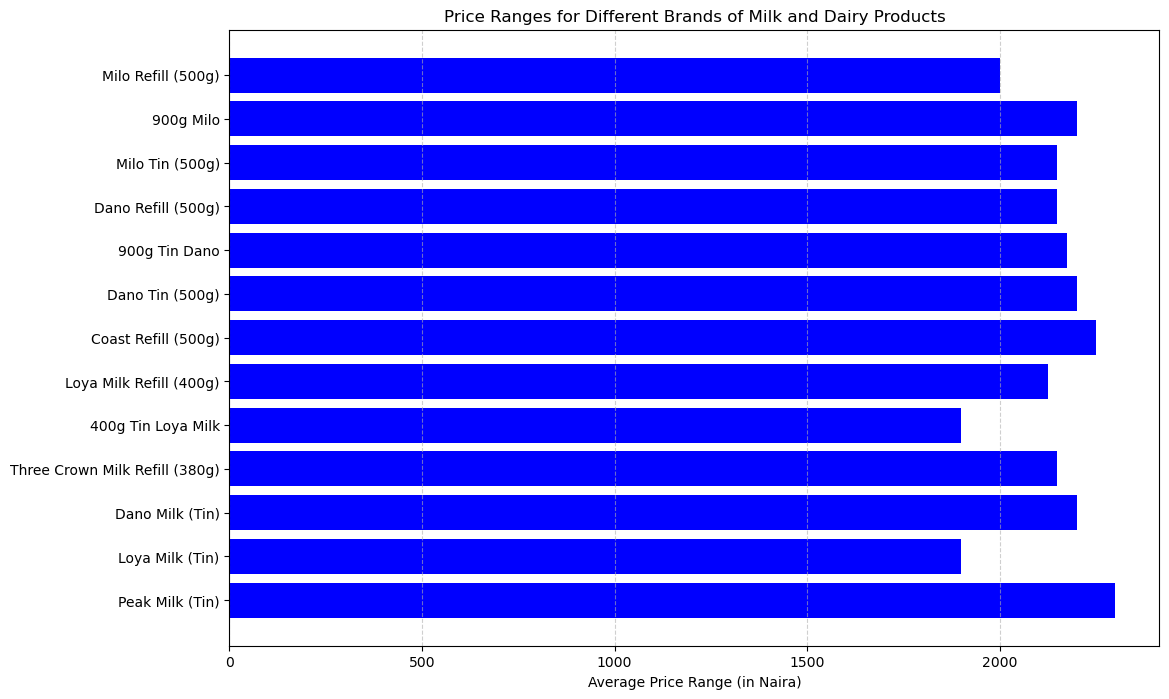

In [116]:

# Define the dataset with relevant information for different brands of milk and dairy products
data = {
    'Product': [
        'Peak Milk (Tin)',
        'Loya Milk (Tin)',
        'Dano Milk (Tin)',
        'Three Crown Milk Refill (380g)',
        '400g Tin Loya Milk',
        'Loya Milk Refill (400g)',
        'Coast Refill (500g)',
        'Dano Tin (500g)',
        '900g Tin Dano',
        'Dano Refill (500g)',
        'Milo Tin (500g)',
        '900g Milo',
        'Milo Refill (500g)',
    ],
    'Price_Range': [
        '1800-2800',
        '1800-2000',
        '1900-2500',
        '1800-2500',
        '1800-2000',
        '1750-2500',
        '1700-2800',
        '1900-2500',
        '1650-2700',
        '1800-2500',
        '1800-2500',
        '1900-2500',
        '1700-2300',
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the product names and price ranges
products = df['Product']
price_ranges = df['Price_Range']

# Convert price ranges to numeric values (use the average of the range)
price_ranges_numeric = [sum(map(int, range_.split('-'))) / 2 for range_ in price_ranges]

# Add the price range as a new column
df['Price_Range_Avg'] = price_ranges_numeric

# Create a bar plot to visualize the price ranges
plt.figure(figsize=(12, 8))
plt.barh(df['Product'], df['Price_Range_Avg'], color='blue')
plt.xlabel('Average Price Range (in Naira)')
plt.title('Price Ranges for Different Brands of Milk and Dairy Products')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


The price range for Coca Cola (Plastic Coke) is 150-250 Naira.
The price range for 1 Bottled water is 150-300 Naira.
The price range for Ovaltine Refill 500g is 1200-1850 Naira.
The price range for 500g Ovaltine Plastic is 1200-2000 Naira.
The price range for 500g Refill Bournvita is 1500-2800 Naira.
The price range for Nescafe Classic 50g is 1800-2800 Naira.
The price range for Nescafe Gold Blend is 1800-2800 Naira.
The price range for Bournvita Plastic 500g is 1850-2900 Naira.
The price range for 900g Bournvita Plastic is 2500-3500 Naira.


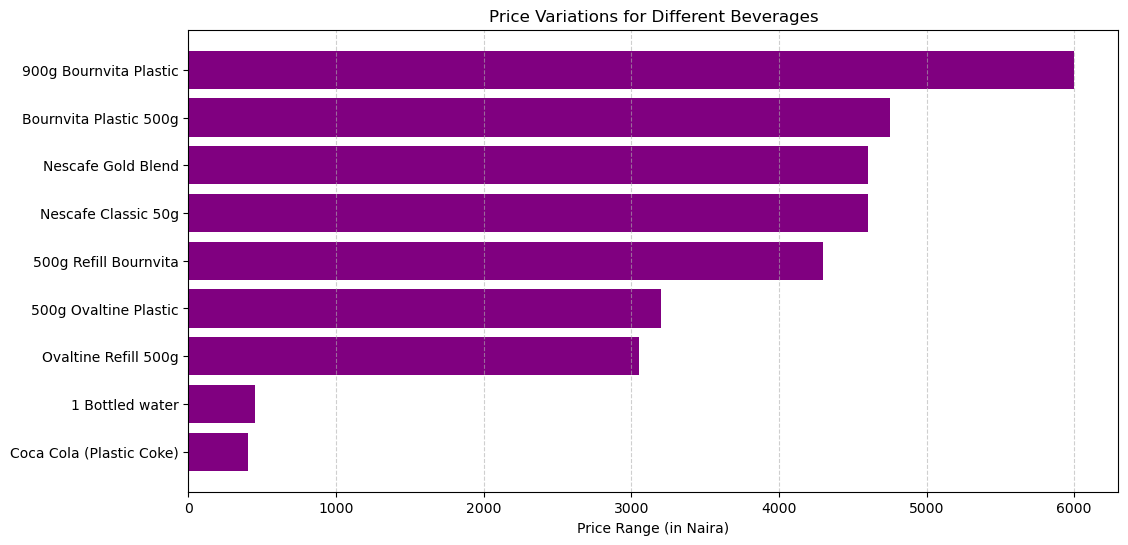

In [117]:
# Explore the price variations for different beverages, including Nescafe, Ovaltine, Coca Cola, and Bournvita.

# Define the dataset with relevant information for different beverages
data = {
    'Item': [
        'Nescafe Classic 50g',
        'Nescafe Gold Blend',
        '500g Ovaltine Plastic',
        'Coca Cola (Plastic Coke)',
        'Ovaltine Refill 500g',
        '1 Bottled water',
        '500g Refill Bournvita',
        'Bournvita Plastic 500g',
        '900g Bournvita Plastic'
    ],
    'Amount': [
        '1800-2800',
        '1800-2800',
        '1200-2000',
        '150-250',
        '1200-1850',
        '150-300',
        '1500-2800',
        '1850-2900',
        '2500-3500'
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the item names and price ranges
items = df['Item']
price_ranges = df['Amount']

# Convert price ranges to numeric values
price_ranges_numeric = [int(range_.split('-')[0]) + int(range_.split('-')[1]) for range_ in price_ranges]

# Sort the DataFrame in ascending order
df['Price_Range'] = price_ranges_numeric
df = df.sort_values(by='Price_Range', ascending=True)

# Display the price ranges in ascending order
for item, price_range in zip(df['Item'], df['Amount']):
    print(f"The price range for {item} is {price_range} Naira.")

# Create a bar plot to visualize the price ranges
plt.figure(figsize=(12, 6))
plt.barh(df['Item'], df['Price_Range'], color='purple')
plt.xlabel('Price Range (in Naira)')
plt.title('Price Variations for Different Beverages')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


The price range for 1 Bottled water is 150-300 Naira.
The price range for Pepsi is 150-300 Naira.
The price range for Bigi Drink is 150-300 Naira.
The price range for 5-Alive Juice is 2500 Naira.
The price range for Chi-Vita Juice is 850-2500 Naira.


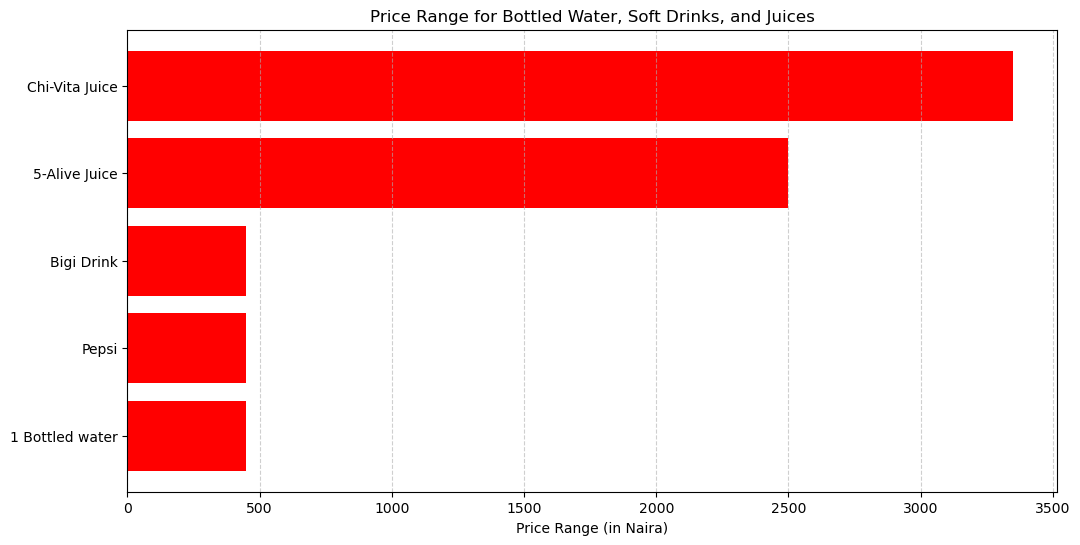

In [118]:
#  What is the price range for bottled water, soft drinks like Pepsi and Bigi Drink, and various juices?

# Define the dataset with relevant information for the specified items
data = {
    'Item': [
        '1 Bottled water',
        'Pepsi',
        'Bigi Drink',
        '5-Alive Juice',
        'Chi-Vita Juice',
    ],
    'Amount': [
        '150-300',
        '150-300',
        '150-300',
        '2500',
        '850-2500',
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the item names and price ranges
items = df['Item']
price_ranges = df['Amount']

# Convert price ranges to numeric values
price_ranges_numeric = [int(range_.split('-')[0]) + int(range_.split('-')[1]) if '-' in range_ else int(range_) for range_ in price_ranges]

# Sort the DataFrame in ascending order based on price range
df['Price_Range'] = price_ranges_numeric
df = df.sort_values(by='Price_Range', ascending=True)

# Display the price ranges in ascending order
for item, price_range in zip(df['Item'], df['Amount']):
    print(f"The price range for {item} is {price_range} Naira.")

# Create a bar plot to visualize the price ranges
plt.figure(figsize=(12, 6))
plt.barh(df['Item'], df['Price_Range'], color='red')
plt.xlabel('Price Range (in Naira)')
plt.title('Price Range for Bottled Water, Soft Drinks, and Juices')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


## Spices and Seasonings

The price range for Potash (Akanwu) is 20-50 Naira.
The price range for Nutmeg is 20-100 Naira.
The price range for Garlic powder is 50-100 Naira.
The price range for Powder Ginger is 80-120 Naira.
The price range for Dangote Salt is 70-150 Naira.
The price range for Curry is 70-200 Naira.
The price range for Thyme is 120-200 Naira.
The price range for Maggi is 10-550 Naira.
The price range for Black Pepper is 200-400 Naira.
The price range for Knorr is 500-550 Naira.
The price range for Grinned Pepper is 300-1000 Naira.


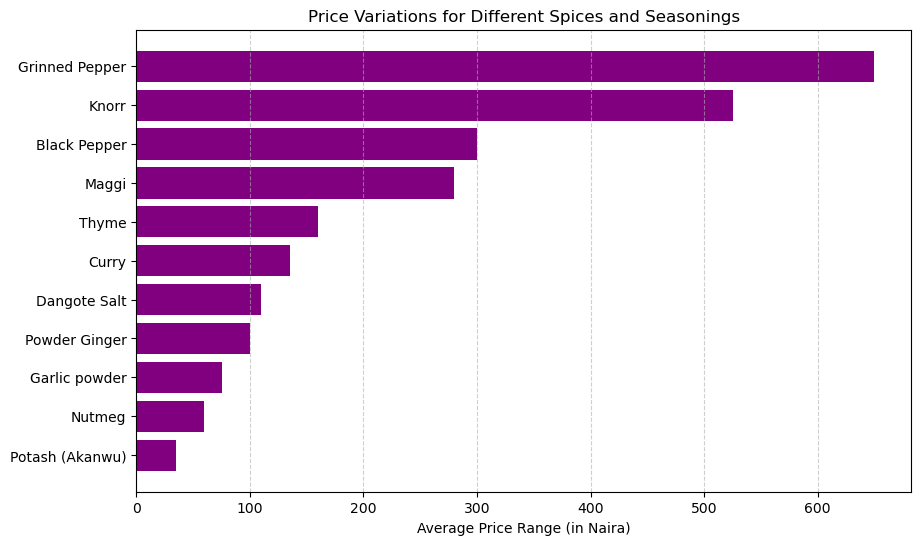

In [119]:
# What are the price variations for different spices and seasonings?

# Define the dataset with relevant information for different spices and seasonings
data = {
    'Spice_Seasoning': ['Black Pepper', 'Maggi', 'Nutmeg', 'Potash (Akanwu)', 'Powder Ginger', 'Garlic powder', 'Grinned Pepper', 'Knorr', 'Curry', 'Dangote Salt', 'Thyme'],
    'Price_Range': ['200-400', '10-550', '20-100', '20-50', '80-120', '50-100', '300-1000', '500-550', '70-200', '70-150', '120-200']
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the spice and seasoning names and price ranges
spices_seasonings = df['Spice_Seasoning']
price_ranges = df['Price_Range']

# Convert price ranges to numeric values (use the average of the range)
price_ranges_numeric = [(int(range_.split('-')[0].strip()) + int(range_.split('-')[1].strip())) / 2 for range_ in price_ranges]

# Add the price range as a new column
df['Price_Range_Avg'] = price_ranges_numeric

# Sort the DataFrame in ascending order based on price range
df = df.sort_values(by='Price_Range_Avg', ascending=True)

# Display the price variations for different spices and seasonings
for spice_seasoning, price_range in zip(df['Spice_Seasoning'], df['Price_Range']):
    print(f"The price range for {spice_seasoning} is {price_range} Naira.")

# Create a bar plot to visualize the price variations
plt.figure(figsize=(10, 6))
plt.barh(df['Spice_Seasoning'], df['Price_Range_Avg'], color='purple')
plt.xlabel('Average Price Range (in Naira)')
plt.title('Price Variations for Different Spices and Seasonings')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [120]:
# Which spice or seasoning has the widest price range?

# Define the dataset with relevant information for different spices and seasonings
data = {
    'Spice_Seasoning': ['Black Pepper', 'Maggi', 'Nutmeg', 'Potash (Akanwu)', 'Powder Ginger', 'Garlic powder', 'Grinned Pepper', 'Knorr', 'Curry', 'Dangote Salt', 'Thyme'],
    'Price_Range': ['200-400', '10-550', '20-100', '20-50', '80-120', '50-100', '300-1000', '500-550', '70-200', '70-150', '120-200']
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the spice and seasoning names and price ranges
spices_seasonings = df['Spice_Seasoning']
price_ranges = df['Price_Range']

# Calculate the width of the price range for each spice or seasoning
price_range_widths = [int(range_.split('-')[1].strip()) - int(range_.split('-')[0].strip()) for range_ in price_ranges]

# Add the price range width as a new column
df['Price_Range_Width'] = price_range_widths

# Sort the DataFrame in descending order based on price range width
df = df.sort_values(by='Price_Range_Width', ascending=False)

# Display the spice or seasoning with the widest price range
widest_spice_seasoning = df.iloc[0]['Spice_Seasoning']
widest_price_range = df.iloc[0]['Price_Range_Width']
print(f"The spice or seasoning with the widest price range is {widest_spice_seasoning} with a range of {widest_price_range}.")

The spice or seasoning with the widest price range is Grinned Pepper with a range of 700.


## Fruits and Vegetables

The price range for Tangerine is 100 Naira.
The price range for Cherry (Agbalumo) is 50-100 Naira.
The price range for Avocado is 50-150 Naira.
The price range for Lemon is 100-200 Naira.
The price range for Soursop is 500 Naira.
The price range for Plantain is 300-500 Naira.
The price range for Orange (1kg) is 200-700 Naira.
The price range for Banana (1kg) is 400-600 Naira.
The price range for Banana is 500-1000 Naira.


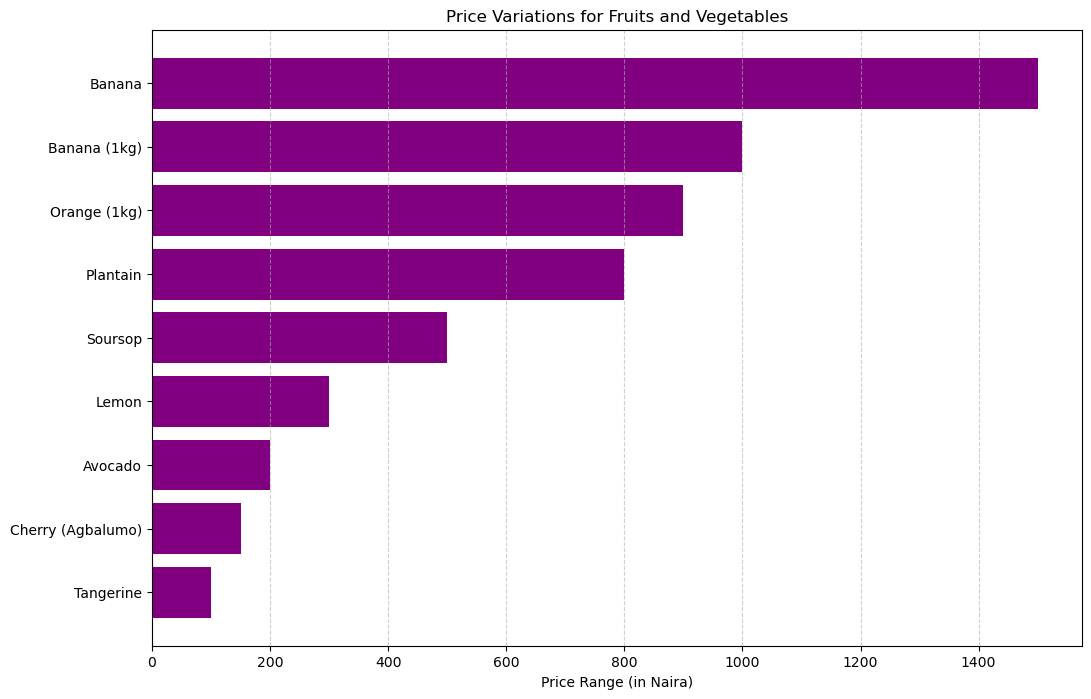

In [121]:
# What are the price variations for fruits and vegetables?

# Define the dataset with relevant information for various fruits and vegetables
data = {
    'Item': [
        'Avocado',
        'Banana',
        'Banana (1kg)',
        'Plantain',
        'Cherry (Agbalumo)',
        'Soursop',
        'Tangerine',
        'Lemon',
        'Orange (1kg)',
    ],
    'Amount': [
        '50-150',
        '500-1000',
        '400-600',
        '300-500',
        '50-100',
        '500',
        '100',
        '100-200',
        '200-700',
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the item names and price ranges
items = df['Item']
price_ranges = df['Amount']

# Convert price ranges to numeric values
price_ranges_numeric = [int(range_.split('-')[0]) + int(range_.split('-')[1]) if '-' in range_ else int(range_) for range_ in price_ranges]

# Sort the DataFrame in ascending order based on price range
df['Price_Range'] = price_ranges_numeric
df = df.sort_values(by='Price_Range', ascending=True)

# Display the price ranges in ascending order
for item, price_range in zip(df['Item'], df['Amount']):
    print(f"The price range for {item} is {price_range} Naira.")

# Create a bar plot to visualize the price ranges
plt.figure(figsize=(12, 8))
plt.barh(df['Item'], df['Price_Range'], color='purple')
plt.xlabel('Price Range (in Naira)')
plt.title('Price Variations for Fruits and Vegetables')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

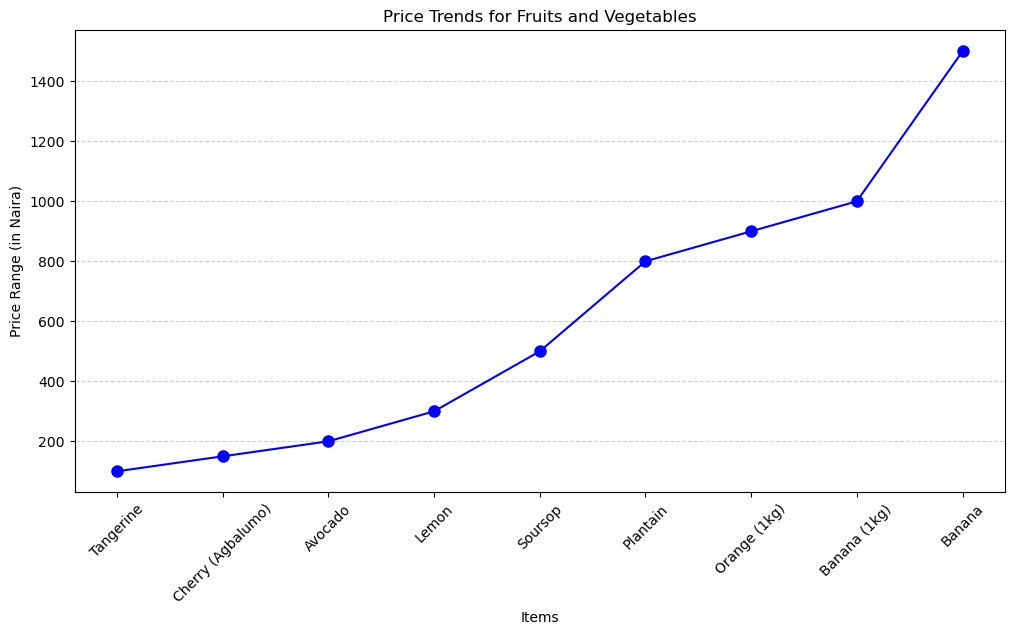

In [122]:
# Are there any noticeable price trends for fruits and vegetables?

# Define the dataset with relevant information for various fruits and vegetables
data = {
    'Item': [
        'Avocado',
        'Banana',
        'Banana (1kg)',
        'Plantain',
        'Cherry (Agbalumo)',
        'Soursop',
        'Tangerine',
        'Lemon',
        'Orange (1kg)',
    ],
    'Amount': [
        '50-150',
        '500-1000',
        '400-600',
        '300-500',
        '50-100',
        '500',
        '100',
        '100-200',
        '200-700',
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the item names and price ranges
items = df['Item']
price_ranges = df['Amount']

# Convert price ranges to numeric values
price_ranges_numeric = [int(range_.split('-')[0]) + int(range_.split('-')[1]) if '-' in range_ else int(range_) for range_ in price_ranges]

# Sort the DataFrame in ascending order based on price range
df['Price_Range'] = price_ranges_numeric
df = df.sort_values(by='Price_Range', ascending=True)

# Create a line plot to visualize the price trends
plt.figure(figsize=(12, 6))
plt.plot(df['Item'], df['Price_Range'], marker='o', color='blue', linestyle='-', markersize=8)
plt.xlabel('Items')
plt.ylabel('Price Range (in Naira)')
plt.title('Price Trends for Fruits and Vegetables')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## Nuts and Seeds

The price range for Potash (Akanwu) is 20-50 Naira.
The price range for Nutmeg is 20-100 Naira.
The price range for Cashew is 100-400 Naira.
The price range for Locust Beans (Dawa-Dawa) is 50-1000 Naira.
The price range for Coconut is 100-2000 Naira.


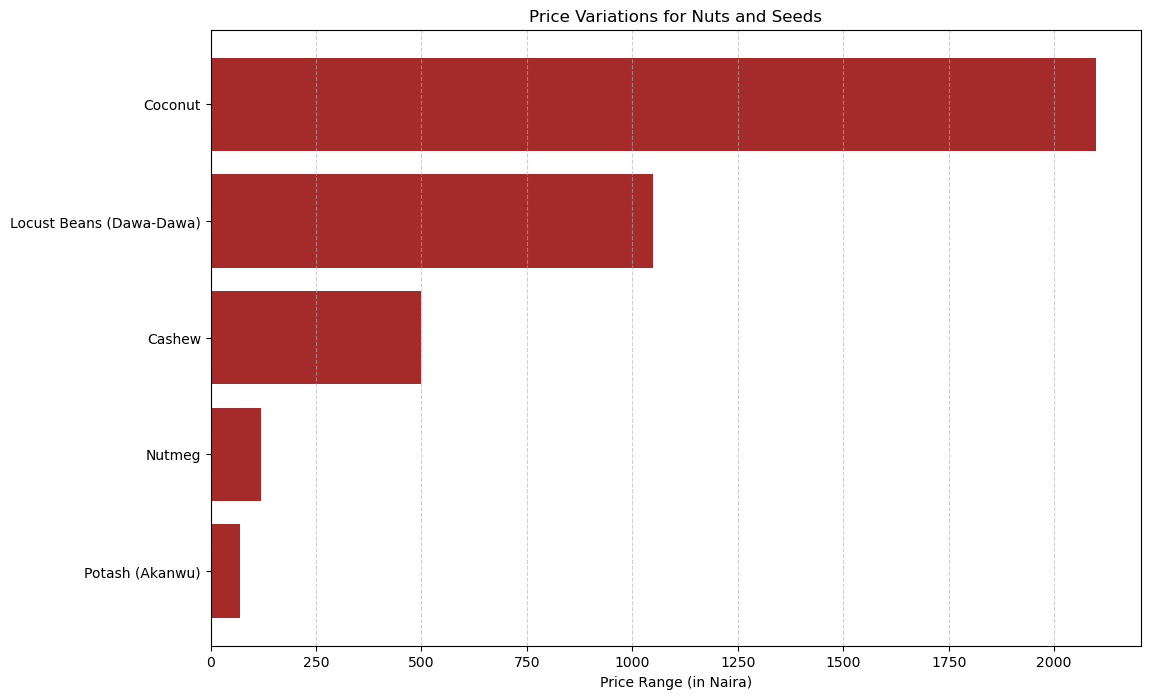

In [123]:
# What are the price variations for different types of nuts and seeds?

# Define the dataset with relevant information for various nuts and seeds
data = {
    'Item': [
        'Cashew',
        'Coconut',
        'Locust Beans (Dawa-Dawa)',
        'Nutmeg',
        'Potash (Akanwu)',
    ],
    'Amount': [
        '100-400',
        '100-2000',
        '50-1000',
        '20-100',
        '20-50',
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the item names and price ranges
items = df['Item']
price_ranges = df['Amount']

# Convert price ranges to numeric values
price_ranges_numeric = [int(range_.split('-')[0]) + int(range_.split('-')[1]) if '-' in range_ else int(range_) for range_ in price_ranges]

# Sort the DataFrame in ascending order based on price range
df['Price_Range'] = price_ranges_numeric
df = df.sort_values(by='Price_Range', ascending=True)

# Display the price ranges in ascending order
for item, price_range in zip(df['Item'], df['Amount']):
    print(f"The price range for {item} is {price_range} Naira.")

# Create a bar plot to visualize the price ranges
plt.figure(figsize=(12, 8))
plt.barh(df['Item'], df['Price_Range'], color='brown')
plt.xlabel('Price Range (in Naira)')
plt.title('Price Variations for Nuts and Seeds')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


## Tropical Fruits

The price range for Mango is 50-100 Naira.
The price range for Guava is 100-350 Naira.


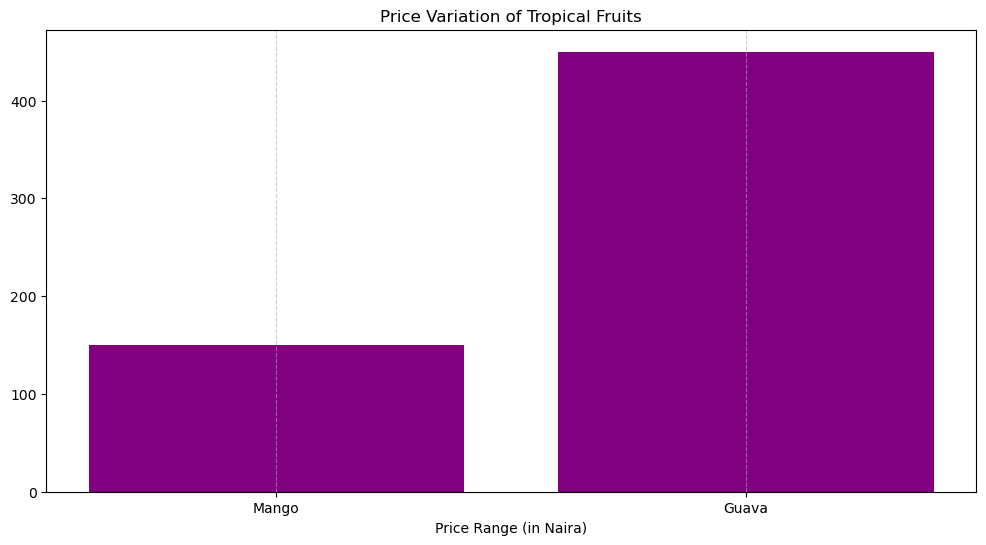

In [124]:
# How do the prices of tropical fruits like Guava and Mango vary?

# Define the dataset with relevant information for the specified tropical fruits
data = {
    'Item': [
        'Guava',
        'Mango',
    ],
    'Amount': [
        '100-350',
        '50-100',
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the item names and price ranges
items = df['Item']
price_ranges = df['Amount']

# Convert price ranges to numeric values
price_ranges_numeric = [int(range_.split('-')[0]) + int(range_.split('-')[1]) for range_ in price_ranges]

# Sort the DataFrame in ascending order based on price range
df['Price_Range'] = price_ranges_numeric
df = df.sort_values(by='Price_Range', ascending=True)

# Display the price ranges in ascending order
for item, price_range in zip(df['Item'], df['Amount']):
    print(f"The price range for {item} is {price_range} Naira.")

# Create a bar plot to visualize the price ranges
plt.figure(figsize=(12, 6))
plt.bar(df['Item'], df['Price_Range'], color='purple')
plt.xlabel('Price Range (in Naira)')
plt.title('Price Variation of Tropical Fruits')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


## Meat and Protein sources

The price range for Cray Fish is 100 Naira.
The price range for Kpomo (Cow Skin) is 200 Naira.
The price range for Prawn is 200-500 Naira.
The price range for Goat Meat is 500 Naira.
The price range for Gizzard is 300-1000 Naira.
The price range for Snail is 500-800 Naira.
The price range for Beef is 500-800 Naira.
The price range for Chicken (0.5Kg) is 1000 Naira.
The price range for Titus is 1000 Naira.
The price range for Turkey (0.5kg) is 1000 Naira.
The price range for Tilapia is 600-1500 Naira.
The price range for Chicken (1Kg) is 1200 Naira.
The price range for Turkey (1Kg) is 1400 Naira.
The price range for Croaker is 1000-3000 Naira.
The price range for Ram Meat is 500-5000 Naira.


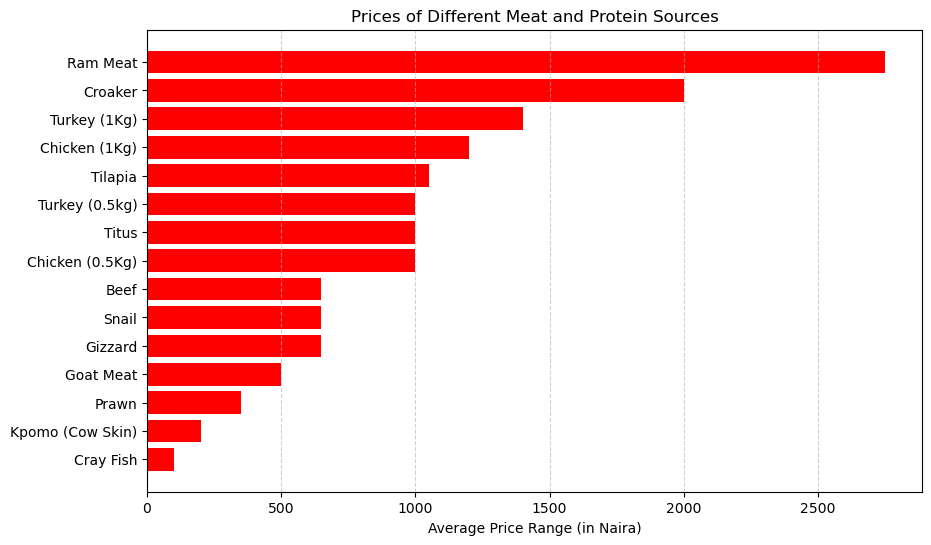

In [125]:
# How do the prices of different meat and protein sources compare?
# Define the dataset with relevant information for different meat and protein sources
data = {
    'Meat_Protein': [
        'Tilapia',
        'Croaker',
        'Gizzard',
        'Cray Fish',
        'Kpomo (Cow Skin)',
        'Ram Meat',
        'Goat Meat',
        'Snail',
        'Beef',
        'Chicken (1Kg)',
        'Chicken (0.5Kg)',
        'Titus',
        'Turkey (1Kg)',
        'Turkey (0.5kg)',
        'Prawn',
    ],
    'Price_Range': [
        '600-1500',
        '1000-3000',
        '300-1000',
        '100',
        '200',
        '500-5000',
        '500',
        '500-800',
        '500-800',
        '1200',
        '1000',
        '1000',
        '1400',
        '1000',
        '200-500',
    ]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Extract the meat and protein source names and price ranges
meat_protein = df['Meat_Protein']
price_ranges = df['Price_Range']

# Convert price ranges to numeric values (use the average of the range)
price_ranges_numeric = [(int(range_.split('-')[0].strip()) + int(range_.split('-')[1].strip())) / 2 if '-' in range_ else int(range_) for range_ in price_ranges]

# Add the price range as a new column
df['Price_Range_Avg'] = price_ranges_numeric

# Sort the DataFrame in ascending order based on price range
df = df.sort_values(by='Price_Range_Avg', ascending=True)

# Display the prices of different meat and protein sources
for meat, price_range in zip(df['Meat_Protein'], df['Price_Range']):
    print(f"The price range for {meat} is {price_range} Naira.")

# Create a bar plot to visualize the prices
plt.figure(figsize=(10, 6))
plt.barh(df['Meat_Protein'], df['Price_Range_Avg'], color='red')
plt.xlabel('Average Price Range (in Naira)')
plt.title('Prices of Different Meat and Protein Sources')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()
